Start with autoreload magic; this reloads modules automatically before entering the execution of code and thus enabled development in modules like util.py

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob
from subprocess import check_call
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import util

In [3]:
#droot = f"{config.project_tmpdir}/simulation-data/CAMS_LMDZ"
droot = "/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack"

# initial set up and download (no longer used):

#os.makedirs(droot, exist_ok=True)
#files = [
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFAPO_OCN.carboscope.apo99X_v2021.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_FF.GCP-GridFED.v2021.3.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_FF.OCO2-MIP.v2020.1.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_OCN.cesm_fosi_smyle.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_OCN.MPI-SOM-FFN.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFN2_OCN.cesm_fosi_smyle.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFN2_OCN.era5_shf.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_FF.GCP-GridFED.v2021.3.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_OCN.cesm_fosi_smyle.txt'
#    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_OCN.gk2001_R2016.repeat_monclim.txt'
#]

#for f in files:
#    txt_file = f'{droot}/{os.path.basename(f)}'
#    
#    if not os.path.exists(f):
#        continue
#        check_call(['wget', f], cwd=droot)

copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_surface_models.html

		# for CAMS, first read in obs
		stanc=nc_open(paste(obsobspackdir,'/co2_',tolower(sta),'_',type,'-',meth,'_',labid,'_',filt,'.nc',sep=''))
                stadat=data.frame(cbind(ncvar_get(stanc,'time_decimal'),t(ncvar_get(stanc,'time_components')),ncvar_get(stanc,'value')*1E6)) ; colnames(stadat)=c('date','year','mon','day','hour','min','sec','co2')
		system('rm cams_station_data_temp.txt')
		if(case==1){ 
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacktotfile,sep='')
		} else if(case==3){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackfosfile,sep='')
		} else if(case==4){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackocefile,sep='')
		} else if(case==5){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacklndfile,sep='')
		}
		system(paste('grep co2_',tolower(sta),'_',type,'-',meth,'_',labid,'_',filt,' ',modobspackfile,' > cams_station_data_temp.txt',sep=''))
		camsin=read.table('cams_station_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
		ids=ncvar_get(stanc,'obspack_id')
		stadat$co2=rep(NA,nrow(stadat)) # remove old
                stadat$co2[is.element(ids,camsin[,1])]=camsin[,2][match(ids[is.element(ids,camsin[,1])],camsin[,1])]


and copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_aircraft_models.html

    obsobspackdir=paste(project_tmpdir_obs,'/',gvp60dir,sep='') # read in actual data files from same GV+ version, then swap in from single CAMS file
	orcnc=nc_open(paste(obsobspackdir,'/co2_orc_aircraft-insitu_3_allvalid-merge10.nc',sep=''))
	tomnc=nc_open(paste(obsobspackdir,'/co2_tom_aircraft-insitu_1_allvalid.nc',sep=''))
	hipnc=nc_open(paste(obsobspackdir,'/co2_hip_aircraft-insitu_59_allvalid.nc',sep=''))

	if(case==1){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacktotfile,sep='')
	} else if(case==3){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackfosfile,sep='')
	} else if(case==4){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackocefile,sep='')
	} else if(case==5){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacklndfile,sep='')
	}

	orcdat=data.frame(cbind(t(ncvar_get(orcnc,'time_components')),ncvar_get(orcnc,'altitude'),ncvar_get(orcnc,'latitude'),ncvar_get(orcnc,'longitude'),ncvar_get(orcnc,'value')*1E6),ncvar_get(orcnc,'obspack_id')) ; colnames(orcdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_orcas_data_temp.txt')
	system(paste('grep co2_orc_aircraft-insitu_3_allvalid-merge10 ',modobspackfile,' > cams_orcas_data_temp.txt',sep=''))
	camsin=read.table('cams_orcas_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	orcdat$co2=rep(NA,nrow(orcdat)) # remove old
	orcdat[is.element(orcdat$obspack_id,camsin[,1]),'co2']=camsin[match(orcdat$obspack_id[is.element(orcdat$obspack_id,camsin[,1])],camsin[,1]),2]

	tomdat=data.frame(cbind(t(ncvar_get(tomnc,'time_components')),ncvar_get(tomnc,'altitude'),ncvar_get(tomnc,'latitude'),ncvar_get(tomnc,'longitude'),ncvar_get(tomnc,'value')*1E6),ncvar_get(tomnc,'obspack_id')) ; colnames(tomdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_atom_data_temp.txt')
	system(paste('grep co2_tom_aircraft-insitu_1_allvalid ',modobspackfile,' > cams_atom_data_temp.txt',sep=''))
	camsin=read.table('cams_atom_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	tomdat$co2=rep(NA,nrow(tomdat)) # remove old
	tomdat[is.element(tomdat$obspack_id,camsin[,1]),'co2']=camsin[match(tomdat$obspack_id[is.element(tomdat$obspack_id,camsin[,1])],camsin[,1]),2]

	hipdat=data.frame(cbind(t(ncvar_get(hipnc,'time_components')),ncvar_get(hipnc,'altitude'),ncvar_get(hipnc,'latitude'),ncvar_get(hipnc,'longitude'),ncvar_get(hipnc,'value')*1E6),ncvar_get(hipnc,'obspack_id')) ; colnames(hipdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_hippo_data_temp.txt')
	system(paste('grep co2_hip_aircraft-insitu_59_allvalid ',modobspackfile,' > cams_hippo_data_temp.txt',sep=''))
	camsin=read.table('cams_hippo_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	hipdat$co2=rep(NA,nrow(hipdat)) # remove old
	## not all v4.2.1 ids are in reported CAMS output, but all reported CAMS output is in v4.2.1
	hipdat[is.element(hipdat$obspack_id,camsin[,1]),'co2']=camsin[match(hipdat$obspack_id[is.element(hipdat$obspack_id,camsin[,1])],camsin[,1]),2]

(note, obsobspackdir should point to GV+ 7.0 now)
    

### Contribution details
- 10 text files in CAMS-specific format, one each corresponding to requested tracers
- within each of which are 460,635 rows and 2 columns (ObsPack ID and Value)
- it is necessary to match ObsPack ID to the original file
- Example first three lines:

LJO_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_ljo_surface-flask_4_representative\~13859752 406.65870540710057

LJO_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_ljo_surface-flask_4_representative\~13859753 395.99932744773474

ALT_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_alt_surface-flask_4_representative\~13856865 395.0473775069313

From Frederic: 
For APO, you should multiply the values that I provided by 12/64.4 after having removed the 400 ppm offset.
For O2, the factor would simply be 12/32.
For N2, it's 12/14.

o2_gridfed fluxes appear to stop in 2015, which affects apo_gridfed too

In [4]:
# need to read in obs and then add CAMS tracers in
obspack_dir = "/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc"
obspack_filenames = [ # now including aircraft
    f"{obspack_dir}/co2_alt_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_brw_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cba_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cgo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_kum_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_ljo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_mlo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_psa_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_smo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_spo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_hip_aircraft-insitu_59_allvalid.nc",
    f"{obspack_dir}/co2_orc_aircraft-insitu_3_allvalid-merge10.nc",
    f"{obspack_dir}/co2_tom_aircraft-insitu_1_allvalid.nc",
    f"{obspack_dir}/co2_gould_shipboard-insitu_1_allvalid.nc",
    f"{obspack_dir}/co2_aoa_aircraft-flask_19_allvalid.nc",
]

obspack_files = {}
station_list = []
for f in obspack_filenames:
    stn = os.path.basename(f).split('_')[1]
    station_list.append(stn)
    obspack_files[stn] = os.path.basename(f)

In [9]:
sno_vars = [
    'apo_jena',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
] # without derived vars

cams_dict = { 
    'apo_jena' : 'APO_OCN.carboscope.apo99X_v2021',
    'o2_cesm' : 'O2_OCN.cesm_fosi_smyle',
    'o2_gk01r16' : 'O2_OCN.gk2001_R2016.repeat_monclim',
    'o2_gridfed' : 'O2_FF.GCP-GridFED.v2021.3',
    'co2_cesm' : 'CO2_OCN.cesm_fosi_smyle',
    'co2_somffn' : 'CO2_OCN.MPI-SOM-FFN',
    'co2_gridfed' : 'CO2_FF.GCP-GridFED.v2021.3',
    'co2_oco2mip' : 'CO2_FF.OCO2-MIP.v2020.1',  
    'n2_cesm' : 'N2_OCN.cesm_fosi_smyle',
    'n2_era' : 'N2_OCN.era5_shf'
}

# loop on station, open obs, loop on tracer, open file, match obspack_ids and add to obs

X_O2 = 0.2094 

cams_tracer_data = {}
for tracer in cams_dict:
    #print(tracer,cams_dict[tracer])

    path = f"{droot}/XSF{cams_dict[tracer]}.txt"
    print(path)

    cams_df = pd.read_csv(path, delim_whitespace=True, names = ['obspack_id', tracer], comment = '#')

    cams_df['obspack_id'] = cams_df['obspack_id'].str.split('_', n = 1, expand=True).iloc[:,1]

    cams_tracer_data[tracer] = cams_df


station_records = {}
for station in station_list:
    
    obs_path = f"{obspack_dir}/{obspack_files[station]}"
    print(obs_path)
    ds = xr.open_dataset(obs_path)

    tc = ds['time_components']
    tc_save = tc
    tc = tc.to_dataframe(dim_order=['calendar_components','obs']).unstack(level=0)
    tc.columns = ['year', 'month', 'day', 'hour', 'minute', 'second'] 
    droplist = ['time_components','MIP_MDM','MIP_models','assimilation_concerns']
    ds = ds.drop(droplist)
    if station != 'orc' and station != 'tom':
        ds = ds.drop('solartime_components')
    df = ds.to_dataframe()
    df['obspack_id'] = df['obspack_id'].str.decode('utf-8')

    for tracer in cams_dict:
    
        cams_df = cams_tracer_data[tracer]
        
        df = df.merge(cams_df, how = 'left', on = 'obspack_id')

    df['time'] = pd.to_datetime(tc)
    df = df.set_index('time')

    ds = df.to_xarray()
    ds['time_components'] = tc_save

#    ds.to_netcdf(f"inverse_model_obspack_files/CAMS_LMDZ/{obspack_files[station]}")
    
    station_records[station] = ds

    # subtract off background value
    for v in sno_vars:
        ds[v]=ds[v]-400.0

    # Fix mass conversions:
    # For APO, you should multiply the values that I provided by 12/64.4 after having removed the 400 ppm offset.
    # For O2, the factor would simply be 12/32.
    # For N2, it's 12/14.
    ds['apo_jena'] = ds['apo_jena']*12/64.4
    ds['o2_cesm'] = ds['o2_cesm']*12/32
    ds['o2_gk01r16'] = ds['o2_gk01r16']*12/32
    ds['o2_gridfed'] = ds['o2_gridfed']*12/32
    ds['n2_cesm'] = ds['n2_cesm']*12/14
    ds['n2_era'] = ds['n2_era']*12/14
    
    # convert apo_jena to per meg
    ds['apo_jena'] = ds['apo_jena']/X_O2
   
    # add derived APO variables

    ds['apo_cesm'] = util.compute_apo (
        o2=ds['o2_cesm'],
        co2=ds['co2_cesm'],
        n2=ds['n2_cesm']
    )

    ds['apo_diss'] = util.compute_apo (
        o2=ds['o2_gk01r16'],
        co2=ds['co2_somffn'],
        n2=ds['n2_era']
    )

    ds['apo_gridfed'] = util.compute_apo (
        o2=ds['o2_gridfed'],
        co2=ds['co2_gridfed'],
        n2=0.0
    )

    ds['apo_oco2mip'] = util.compute_apo (
        o2=ds['co2_oco2mip'] * -1.4,
        co2=ds['co2_oco2mip'],
        n2=0.0
    )

    ds.to_netcdf(f"inverse_model_obspack_files/CAMS_LMDZ/{obspack_files[station]}")
    
    station_records[station] = ds

/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFAPO_OCN.carboscope.apo99X_v2021.txt
/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFO2_OCN.cesm_fosi_smyle.txt
/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFO2_OCN.gk2001_R2016.repeat_monclim.txt
/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFO2_FF.GCP-GridFED.v2021.3.txt
/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFCO2_OCN.cesm_fosi_smyle.txt
/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFCO2_OCN.MPI-SOM-FFN.txt
/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFCO2_FF.GCP-GridFED.v2021.3.txt
/glade/campaign/eol/raf/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/required_obspack/XSFCO2_FF.OCO2-MIP.v2020.1.txt
/glade/campaign/eol/r

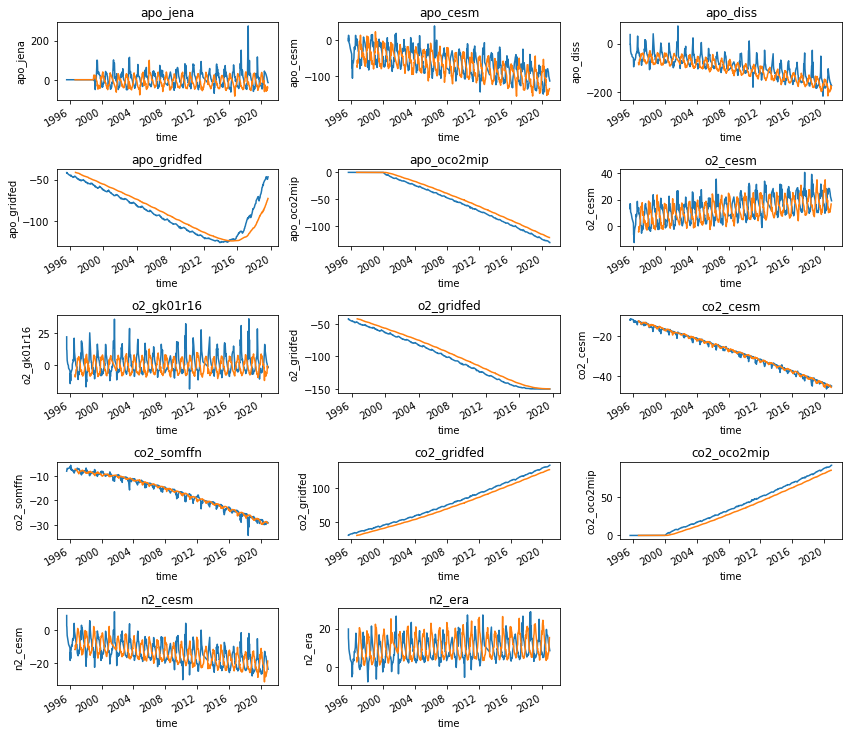

In [32]:
# make timeseries plots

sno_vars = [
    'apo_jena',
    'apo_cesm',
    'apo_diss',
    'apo_gridfed',
    'apo_oco2mip',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
] # including derived vars

station_plot_list=['cba','psa']

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    for stn in station_plot_list:
        station_records[stn][v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    
fig.savefig("cams_lmdz_timeseries.pdf")

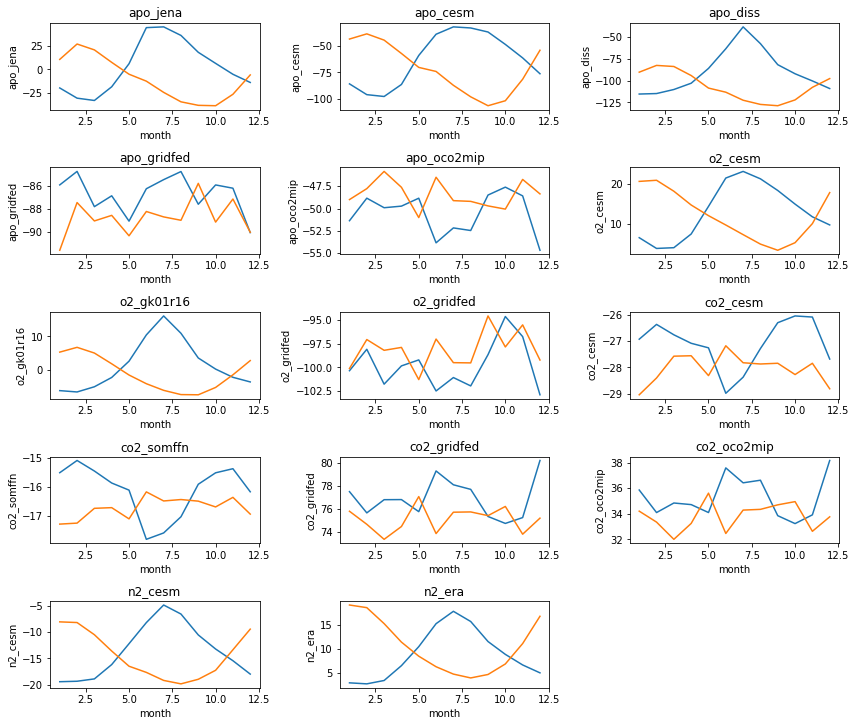

In [11]:
# seasonal climatology

fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    for stn in station_plot_list:
        ds_seas=station_records[stn][v].groupby('time.month').mean('time')
        ds_seas.plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    

In [29]:
# o2_gridfed turns off in 2015
## timing of apo_gridfed inflection seems early?
tmp=station_records['cba']['o2_gridfed']/X_O2+1.1*station_records['cba']['co2_gridfed']/X_O2-station_records['cba']['apo_gridfed']
tmp.max()

<xarray.DataArray ()>
array(0.)

In [30]:
station_records['cba']['time_components']

<xarray.DataArray 'time_components' (obs: 553, calendar_components: 6)>
array([[1995.,    8.,   16.,   20.,   30.,    0.],
       [1995.,    8.,   18.,    0.,   30.,    0.],
       [1995.,    8.,   24.,   19.,    0.,    0.],
       ...,
       [2020.,   10.,   15.,   21.,   35.,    0.],
       [2020.,   11.,   20.,   21.,   55.,    0.],
       [2020.,   12.,    3.,   22.,   40.,    0.]])
Dimensions without coordinates: obs, calendar_components
Attributes:
    long_name:  integer_components_of_UTC_date/time
    order:      year, month, day, hour, minute, second
    comment:    Calendar time components as integers.  Times and dates are UT...